In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Logonfile (1).csv")
df

,user,pc,date,logon,logoff
0,NGF0157,2,410,795,466
1,LRR0148,3,400,841,537
2,IRM0931,2,479,1063,684
3,MOH0273,1,401,401,401
4,LAP0338,1,488,874,488
...,...,...,...,...,...
497,HRW0550,1,346,346,346
498,JER0404,1,346,346,346
499,JPW0741,1,346,346,346
500,MDM0625,2,346,685,408


In [3]:
df.loc[df["pc"]>= 3, "class"] = "suspicious"
df.loc[df["pc"] <= 2, "class"] = "normal" 

df.head

<bound method NDFrame.head of         user  pc  date  logon  logoff       class
0    NGF0157   2   410    795     466      normal
1    LRR0148   3   400    841     537  suspicious
2    IRM0931   2   479   1063     684      normal
3    MOH0273   1   401    401     401      normal
4    LAP0338   1   488    874     488      normal
..       ...  ..   ...    ...     ...         ...
497  HRW0550   1   346    346     346      normal
498  JER0404   1   346    346     346      normal
499  JPW0741   1   346    346     346      normal
500  MDM0625   2   346    685     408      normal
501  NKP0236   1   346    355     355      normal

[502 rows x 6 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    502 non-null    object
 1   pc      502 non-null    int64 
 2   date    502 non-null    int64 
 3   logon   502 non-null    int64 
 4   logoff  502 non-null    int64 
 5   class   502 non-null    object
dtypes: int64(4), object(2)
memory usage: 23.7+ KB


In [5]:
df.describe()

,pc,date,logon,logoff
count,502.000000,502.000000,502.000000,502.000000
mean,39.065737,334.649402,510.131474,414.406375
std,139.055919,75.333249,289.382533,234.842713
min,1.000000,25.000000,46.000000,27.000000
25%,1.000000,346.000000,346.000000,346.000000
50%,1.000000,346.000000,346.000000,346.000000
75%,3.000000,346.000000,641.750000,436.750000
max,720.000000,495.000000,1777.000000,1735.000000


In [6]:
df.isna().sum()

user      0
pc        0
date      0
logon     0
logoff    0
class     0
dtype: int64

In [7]:
df.drop(['user'], axis=1, inplace = True)

In [8]:
df.columns

Index(['pc', 'date', 'logon', 'logoff', 'class'], dtype='object')

In [9]:
df['class'].value_counts()

normal        369
suspicious    133
Name: class, dtype: int64

<AxesSubplot:title={'center':'Distribution of class'}, xlabel='class', ylabel='count'>

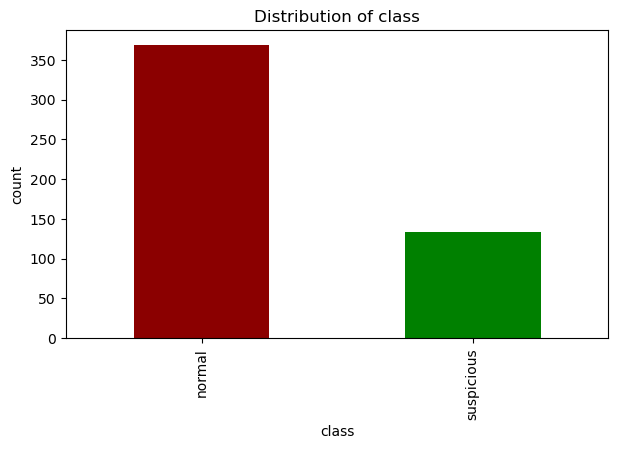

In [10]:
colors = ['darkRed', 'green']
classs_counts = df["class"].value_counts()
plt.figure(figsize=(7,4))
plt.title("Distribution of class")
plt.xlabel("class")
plt.ylabel("count")
classs_counts.plot(kind="bar",color=colors)

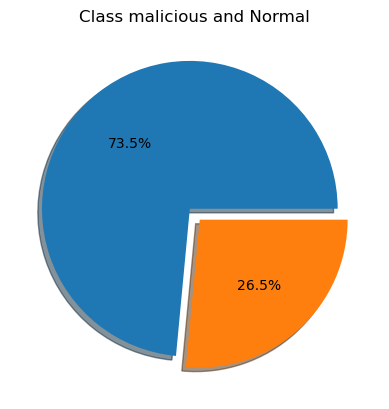

In [11]:
colors = ["DarkOliveGreen","DarkRed"]
plt.pie(df['class'].value_counts(),
        explode=[0.05, 0.05], 
        autopct='%1.1f%%', 
        shadow=True, 
        )
plt.title("Class malicious and Normal")
plt.show()

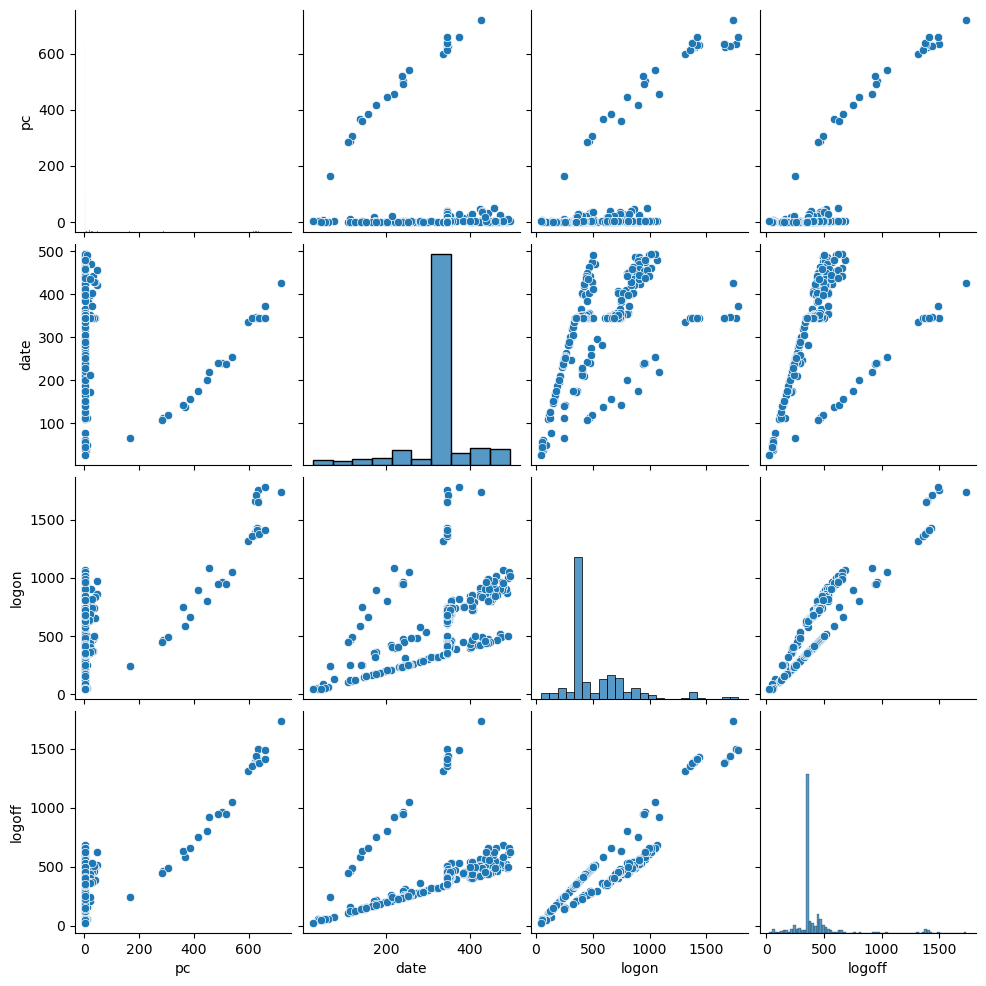

In [12]:
sns.pairplot(df)
plt.show()

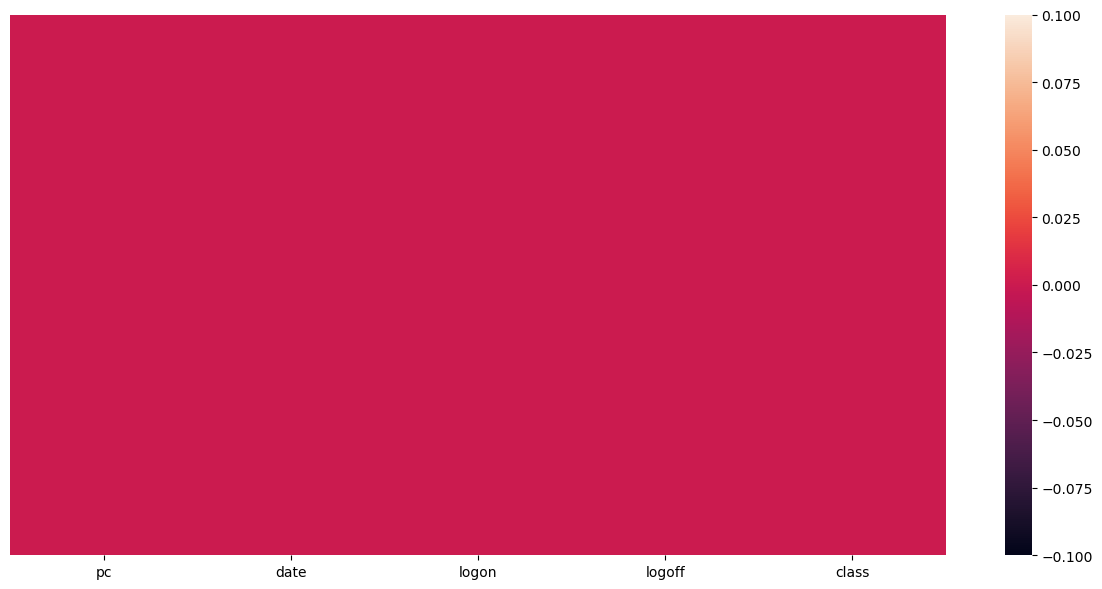

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

<AxesSubplot:>

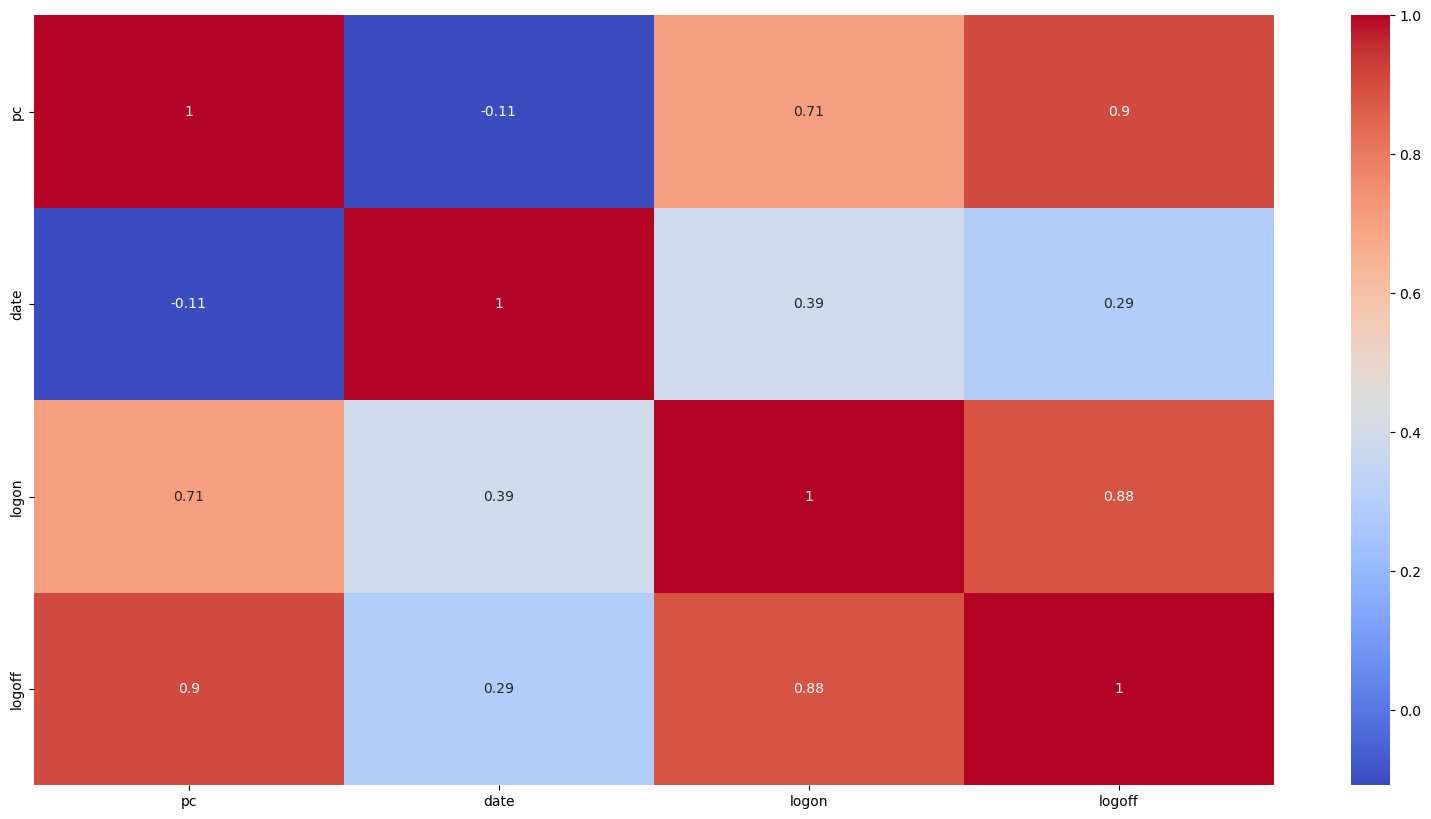

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

array([[<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'date'}>],
       [<AxesSubplot:title={'center':'logon'}>,
        <AxesSubplot:title={'center':'logoff'}>]], dtype=object)

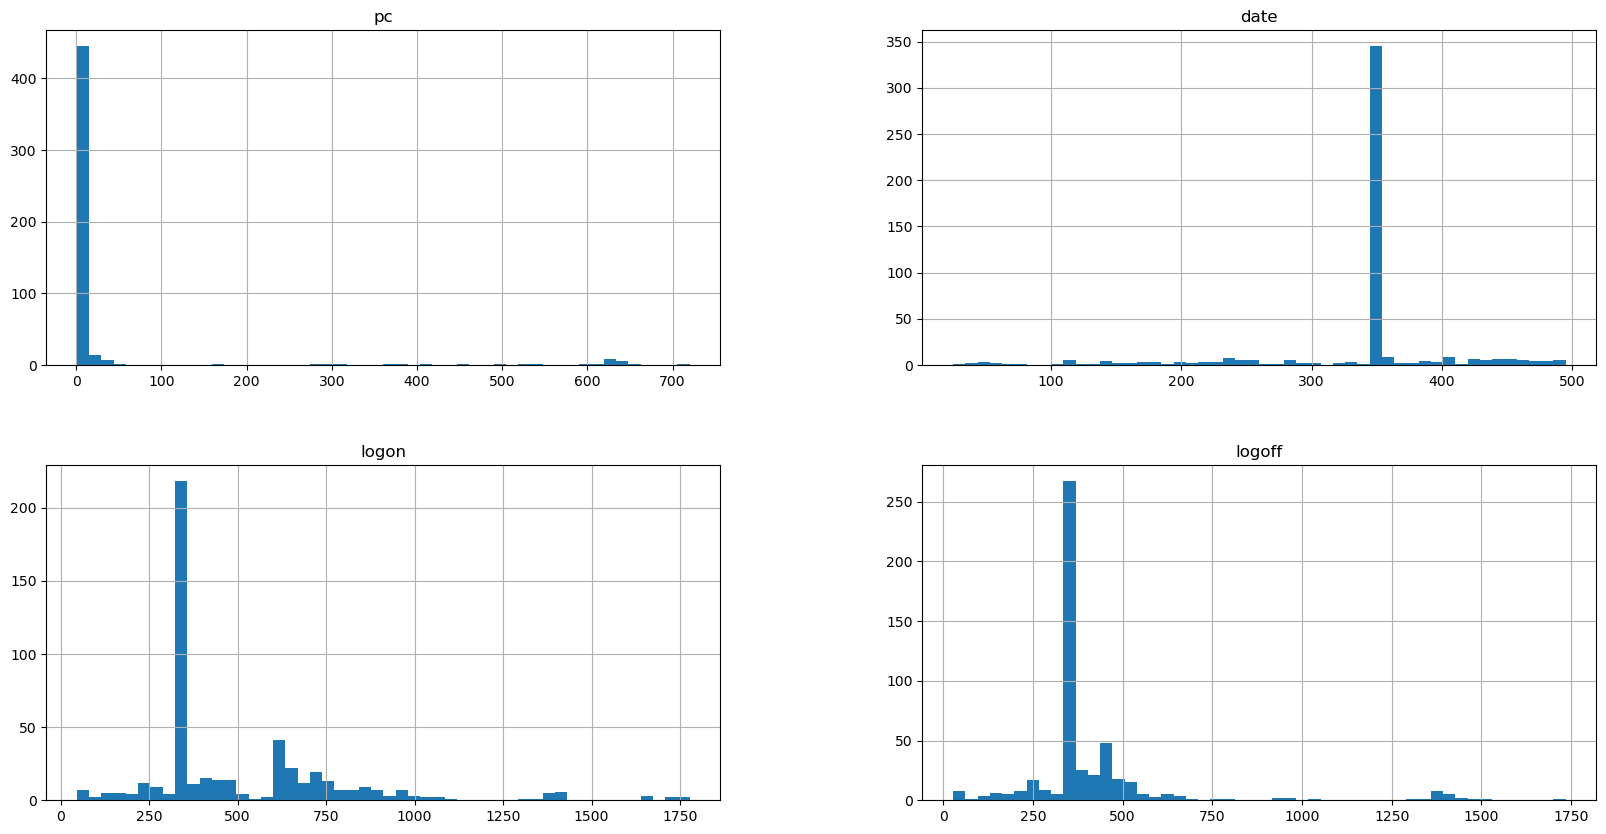

In [15]:
df.hist(figsize=(20,10),bins = 50)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print (le)

LabelEncoder()


In [17]:
df['class']= le.fit_transform(df['class'])
df['class'].unique()

array([0, 1])

In [18]:
df.head

<bound method NDFrame.head of      pc  date  logon  logoff  class
0     2   410    795     466      0
1     3   400    841     537      1
2     2   479   1063     684      0
3     1   401    401     401      0
4     1   488    874     488      0
..   ..   ...    ...     ...    ...
497   1   346    346     346      0
498   1   346    346     346      0
499   1   346    346     346      0
500   2   346    685     408      0
501   1   346    355     355      0

[502 rows x 5 columns]>

In [19]:
X= df[["date","logon", "logoff"]]
y = df.pop('class')

In [20]:
y.value_counts()

0    369
1    133
Name: class, dtype: int64

In [21]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [22]:
# summarize class distribution
counter = Counter(y)
print(counter)


Counter({0: 369, 1: 133})


In [23]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [24]:
counter = Counter(y)
counter

Counter({0: 369, 1: 369})

In [25]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 42, stratify = y)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf= DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv =10)
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(cf)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        74
           1       0.89      0.84      0.86        74

    accuracy                           0.86       148
   macro avg       0.87      0.86      0.86       148
weighted avg       0.87      0.86      0.86       148

K-Fold Validation Mean Accuracy: 86.61 %

Accuracy: 0.86
Precision: 0.89
Recall: 0.84
F1-Score: 0.86
[[66  8]
 [12 62]]


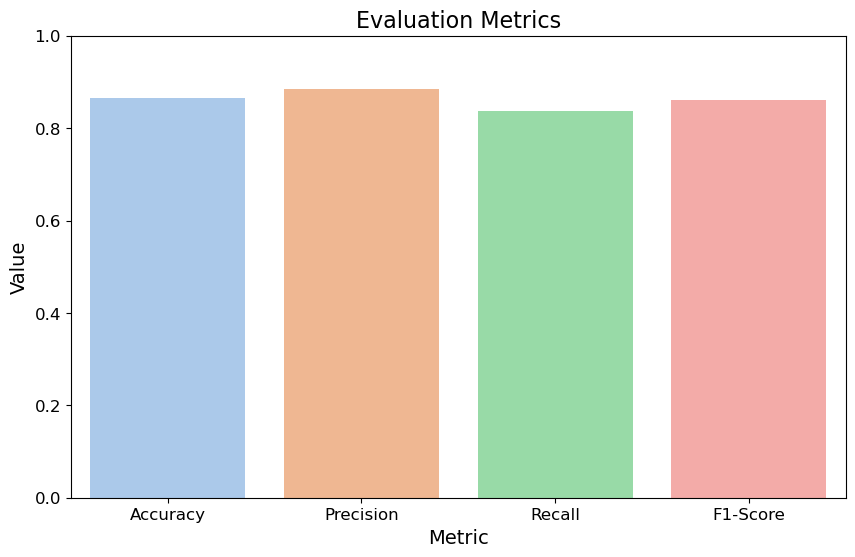

In [27]:
import matplotlib.pyplot as plt


# Set the pastel color palette
sns.set_palette('pastel')

# Create a bar chart for the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy,precision, recall, f1]
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values)
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.title('Evaluation Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

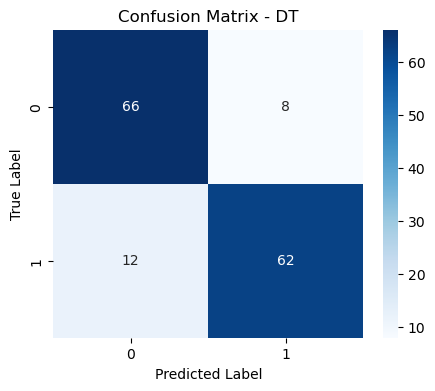

In [28]:
conf_matrix_nb = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - DT')
plt.show()

In [29]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv =10)
print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print('')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(cf)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91        74
           1       0.87      0.97      0.92        74

    accuracy                           0.91       148
   macro avg       0.92      0.91      0.91       148
weighted avg       0.92      0.91      0.91       148

K-Fold Validation Mean Accuracy: 86.27 %

Accuracy: 0.91
Precision: 0.87
Recall: 0.97
F1-Score: 0.92
[[63 11]
 [ 2 72]]


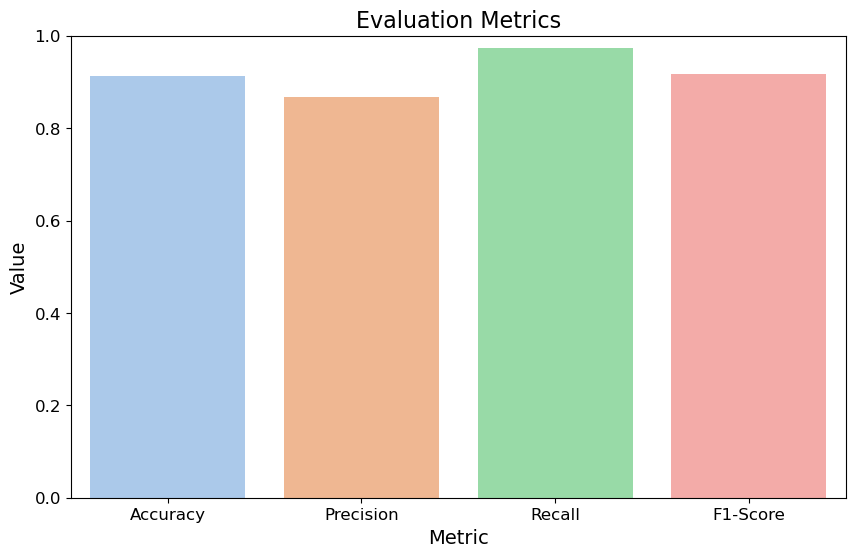

In [30]:

# Set the pastel color palette
sns.set_palette('pastel')

# Create a bar chart for the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy,precision, recall, f1]
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values)
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.title('Evaluation Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

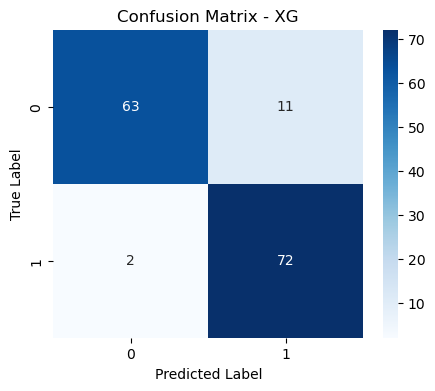

In [31]:
conf_matrix_nb = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XG')
plt.show()

In [32]:
classifiers = [XGBClassifier(random_state=42),  
               DecisionTreeClassifier(random_state=42)
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

C:\Users\rbaa9\AppData\Local\Temp\ipykernel_11564\2679682433.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\rbaa9\AppData\Local\Temp\ipykernel_11564\2679682433.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,


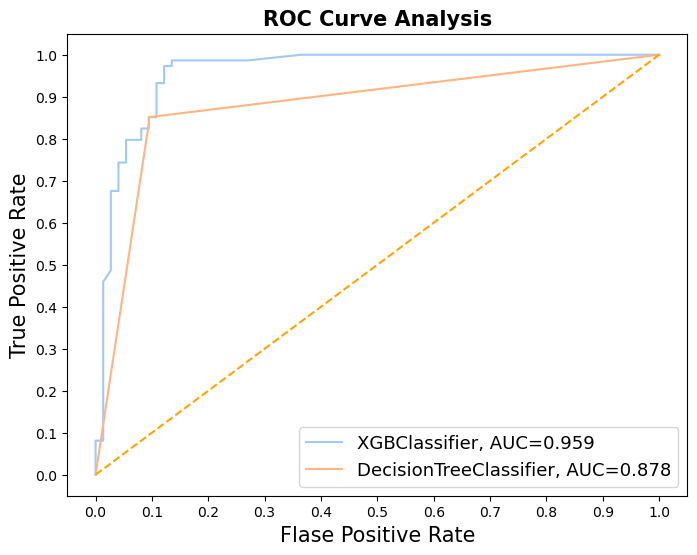

In [33]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()